# Integration (Symbolic & Numeric) (Mr. P Solver)

Video Link: https://youtu.be/2I44Y9hfQ4Q

Codes: https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbTZ5MTBwU0JGRW9IeHI2VW1EdHh2ZTV3MzM5d3xBQ3Jtc0ttMjJWWDRlMWhyblB2SlN6Sm9SdU14RklHRGFmYW15QkNLTWwxTDJkVzU5eWNJU2l2aEQwVF9VRXhWamhURU51cEhya1UtclU5ZDdHbmUwbTh5M09OM0xwZjMtemtiZ042bnpKUkRHRXJ3V2J6M19oWQ&q=https%3A%2F%2Fgithub.com%2Flukepolson%2Fyoutube_channel%2Fblob%2Fmain%2FPython%2520Tutorial%2520Series%2Fintegrals1.ipynb&v=2I44Y9hfQ4Q

In [1]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt

In [2]:
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid

## Symbolic Case

We know the function.
Here we have 2 options:
1. The integral can be solved analytically.
2. The integral cannot be solved analytically.

### Part 1: Solvable Integrals

**Example:** $ \int \sin^3(x) e^{-5x} dx $

In [3]:
x = smp.symbols('x', real = True)

In [4]:
f1 = smp.sin(x)**3 * smp.exp(-5*x)
smp.integrate(f1,x)

-40*exp(-5*x)*sin(x)**3/221 - 21*exp(-5*x)*sin(x)**2*cos(x)/221 - 15*exp(-5*x)*sin(x)*cos(x)**2/442 - 3*exp(-5*x)*cos(x)**3/442

**Example:** $ \int \cos(bx)e^{-ax} dx $

In [5]:
a, b = smp.symbols('a b', real=True, positive=True)
f2 = smp.cos(b*x) * smp.exp(-a*x)
smp.integrate(f2,x).simplify()

(-a*cos(b*x) + b*sin(b*x))*exp(-a*x)/(a**2 + b**2)

**Example:** $ \int \frac{(1+\sqrt{x})^{1/3}}{\sqrt{x}} dx $

In [6]:
f3 = (1+smp.sqrt(x))**smp.Rational(1,3) / smp.sqrt(x)
smp.integrate(f3,x).simplify()

3*(sqrt(x) + 1)**(4/3)/2

**Example:** $ \int_{0}^{\ln(4)}\frac{e^x}{\sqrt{e^{2x}+9}} dx $

In [7]:
f4 = smp.exp(x)/ smp.sqrt(smp.exp(2*x) + 9)
smp.Integral(f4,(x,0,smp.log(4))).doit()

-asinh(1/3) + asinh(4/3)

**Example:** $ \int_{0}^{\infty} \frac{16 \tan^{-1}(x)}{1+x^2} dx $

In [8]:
f5 = 16*smp.atan(x)/(1+x**2)
smp.integrate(f5,(x,0,smp.oo))

2*pi**2

### Part 2: Unsolvable Integrals

In Sympy it keeps running without giving the result until we interrupt it by **Kernel ---> Interrupt**. So, don't run these integrals in Sympy.

We will use **quad** function of Scipy to integrate numerically.

**Example:** $ \int_{1}^{2} e^{-\sin(x)} dx $

In [9]:
f6 = lambda x: np.exp(-np.sin(x))
quad(f6,1,2)

(0.3845918142796868, 4.2698268729567035e-15)

**Example:** $ \int_{0}^{2\pi} \frac{1}{(a-\cos(x))^2 + (b-\sin(x))^2} dx $

Here we need to choose a and b before integration.

In [10]:
f7 = lambda x : 1/((a-np.cos(x))**2 + (b-np.sin(x))**2)
a, b = 1, 2
quad(f7, 0, 2*np.pi)

(1.5707963267948961, 6.710624173315513e-09)

Solution for different values of a and b:

In [11]:
def f8(x,a,b):
    return 1/((a-np.cos(x))**2 + (b-np.sin(x))**2)

In [12]:
a_array = np.arange(1,5,1)
b_array = np.arange(1,5,1)

In [13]:
integrals = [[a,b, quad(f8, 0, 2*np.pi, args=(a,b))[0]] 
           for a in a_array for b in b_array]

In [14]:
integrals  # [a,b,integration]

[[1, 1, 6.283185307179586],
 [1, 2, 1.5707963267948961],
 [1, 3, 0.6981317007977318],
 [1, 4, 0.3926990816987241],
 [2, 1, 1.5707963267948952],
 [2, 2, 0.8975979010256552],
 [2, 3, 0.5235987755982989],
 [2, 4, 0.3306939635357684],
 [3, 1, 0.6981317007977317],
 [3, 2, 0.5235987755982988],
 [3, 3, 0.36959913571644665],
 [3, 4, 0.26179938779914935],
 [4, 1, 0.39269908169872425],
 [4, 2, 0.3306939635357676],
 [4, 3, 0.26179938779914946],
 [4, 4, 0.2026833970057931]]

In [15]:
ap = np.array(integrals).T[0]
bp = np.array(integrals).T[1]
I = np.array(integrals).T[2]

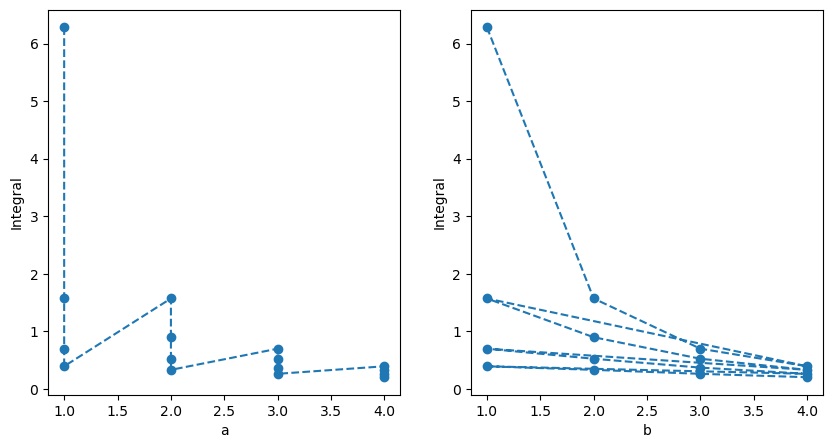

In [16]:
# TRY 3D GRAPH
fig, axes = plt.subplots(1,2,figsize=(10,5))
axa = axes[0]
axa.plot(ap,I,'o--')
axa.set_xlabel('a')
axa.set_ylabel('Integral')
axb = axes[1]
axb.plot(bp,I,'o--')
axb.set_xlabel('b')
axb.set_ylabel('Integral')
plt.show()

## Numerical Case

Text(0, 0.5, '$y_{data}$')

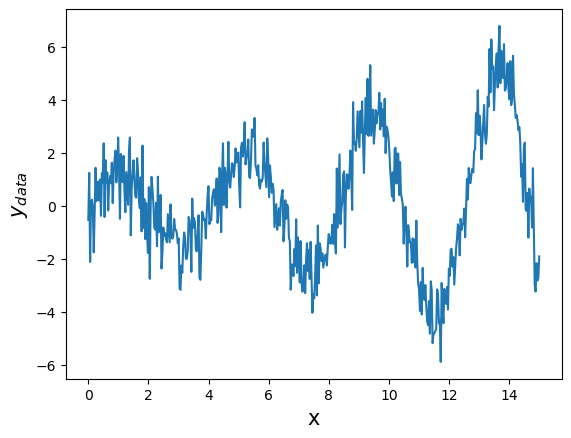

In [17]:
xdata = np.linspace(0.001,15,500)
ydata = np.exp(xdata/8)*np.sin(1.5*xdata) +0.9*np.random.randn(len(xdata))
plt.plot(xdata,ydata)
plt.xlabel('x', fontsize=15)
plt.ylabel('$y_{data}$', fontsize=15)

Function used: `cumulative_trapezoid`

Text(0, 0.5, '$\\int y_{data} dx$')

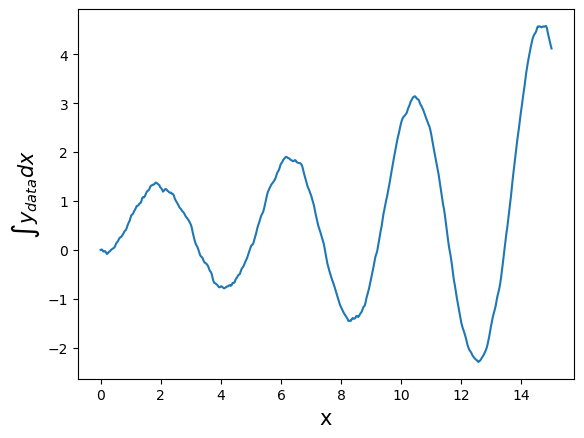

In [18]:
inty = cumulative_trapezoid(ydata, xdata, initial=0)

plt.plot(xdata, inty)
plt.xlabel('x', fontsize=15)
plt.ylabel(r'$\int y_{data} dx$', fontsize=15)